In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from fbprophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose as sm

In [114]:
from statsmodels.tsa.stattools import adfuller

# Function to test the stationarity

def test_stationarity(ts, interval = 1):
  
    rolmean = ts.rolling(interval).mean()
    rolstd = ts.rolling(interval).std()

    plt.plot(ts, label='Original')
    plt.plot(rolmean, label = 'Rolling Mean')
    plt.plot(rolstd, label = 'Rolling Std Dev')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')

    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                             'Number of Observations Used'])
    param1 = dfoutput['Test Statistic']
    param2 = dfoutput['p-value']
    
    if param2 > 0.05:
        print('    The p_value is greater than 5%, series is NOT stationary')
    else:
        print('    The p_value is less than 5%, series is stationary')
              
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        if value < param1:
            print('    The Test Statistic is greater than {0} critical value, series is NOT stationary'.format(key))
        else:
            print('    The Test Statistic is smaller than {0} critical value, series is stationary'.format(key))
                
    
    return dfoutput

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_plot(ts):
    decomposition = seasonal_decompose(ts)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    residual.dropna(inplace=True)
    
    plt.subplot(411)
    plt.plot(ts, label='Original')
    plt.legend(loc = 'best')
    plt.subplot(412)
    plt.plot(trend, label = 'Trend')
    plt.legend(loc = 'best')
    plt.subplot(413)
    plt.plot(seasonal, label = 'Seasonality')
    plt.legend(loc = 'best')
    plt.subplot(414)
    plt.plot(residual, label = 'Residual')
    plt.legend(loc = 'best')
    plt.tight_layout()
    return residual

In [146]:
# Function for differencing

def difference(ts, window=1):
    a = ts.rolling(12).mean()
    b = ts - a
    b.dropna(inplace=True)
    return b

In [126]:
data = pd.read_csv('rainfall_India_1901_2015.csv')
data = data[['YEAR','ANNUAL_AVG']]
data['YEAR'] = pd.to_datetime(data['YEAR'], format="%Y")
data.set_index('YEAR', inplace=True, drop=False)

In [127]:
data.head()

,YEAR,ANNUAL_AVG
YEAR,,
1901-01-01,1901-01-01,86.03
1902-01-01,1902-01-01,85.86
1903-01-01,1903-01-01,99.21
1904-01-01,1904-01-01,84.97
1905-01-01,1905-01-01,81.27


In [131]:
ts = data['ANNUAL_AVG']

    The p_value is less than 5%, series is stationary
    The Test Statistic is smaller than 1% critical value, series is stationary
    The Test Statistic is smaller than 5% critical value, series is stationary
    The Test Statistic is smaller than 10% critical value, series is stationary


Test Statistic                  -4.244926
p-value                          0.000553
#Lags Used                       3.000000
Number of Observations Used    111.000000
Critical Value (1%)             -3.490683
Critical Value (5%)             -2.887952
Critical Value (10%)            -2.580857
dtype: float64

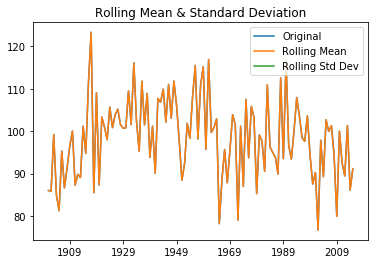

In [132]:
test_stationarity(ts)

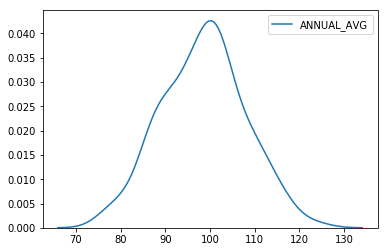

In [140]:
import seaborn as sns
sns.kdeplot(data.ANNUAL_AVG)

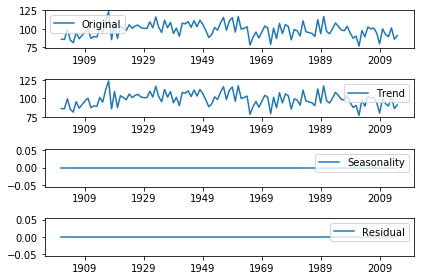

In [145]:
res = decompose_plot(ts)

In [148]:
dff = difference(ts,12)

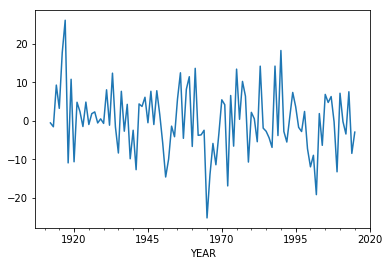

In [149]:
dff.plot()

    The p_value is less than 5%, series is stationary
    The Test Statistic is smaller than 1% critical value, series is stationary
    The Test Statistic is smaller than 5% critical value, series is stationary
    The Test Statistic is smaller than 10% critical value, series is stationary


Test Statistic                  -5.408596
p-value                          0.000003
#Lags Used                       3.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64

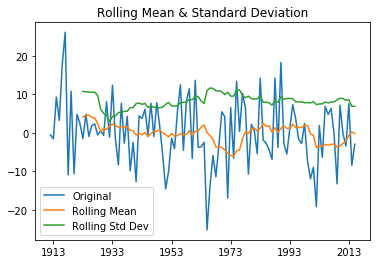

In [150]:
test_stationarity(dff,12)

In [163]:
ts_diff = ts.diff()
ts_diff.dropna(inplace=True)

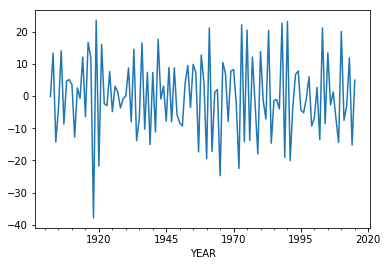

In [164]:
ts_diff.plot()

    The p_value is less than 5%, series is stationary
    The Test Statistic is smaller than 1% critical value, series is stationary
    The Test Statistic is smaller than 5% critical value, series is stationary
    The Test Statistic is smaller than 10% critical value, series is stationary


Test Statistic                -7.536572e+00
p-value                        3.465760e-11
#Lags Used                     5.000000e+00
Number of Observations Used    1.080000e+02
Critical Value (1%)           -3.492401e+00
Critical Value (5%)           -2.888697e+00
Critical Value (10%)          -2.581255e+00
dtype: float64

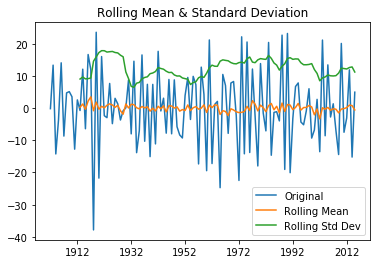

In [165]:
test_stationarity(ts_diff,12)